### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [3]:
#data retrive from https:lazyprogrammer.me/course_files/sp500_close.csv
close = pd.read_csv('sp500_close.csv',index_col = 0, parse_dates=True)

In [4]:
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [6]:
goog = close[['GOOG']].copy().dropna()

In [7]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<AxesSubplot:>

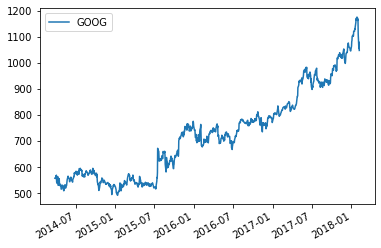

In [8]:
goog.plot()

### Calculate returns

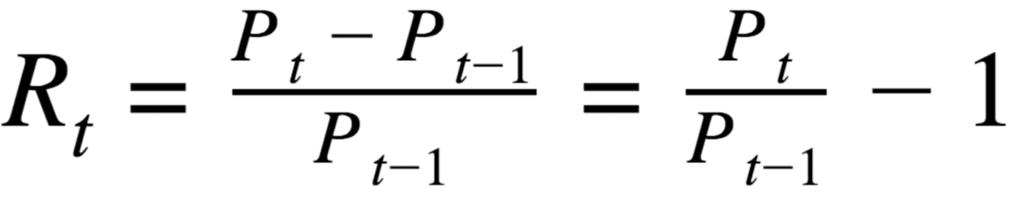

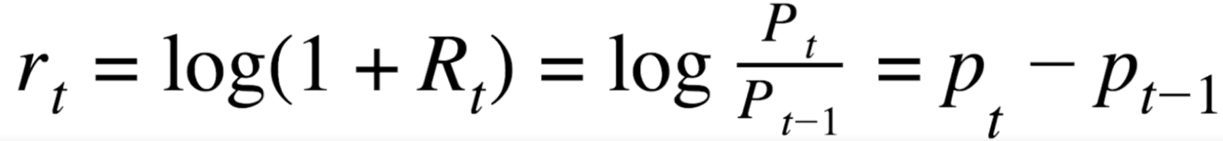

In [9]:
goog_ret = np.log(goog.pct_change(1) + 1)

In [11]:
goog_ret.head()

,GOOG
2014-03-27,NaN
2014-03-28,0.002736
2014-03-31,-0.005408
2014-04-01,0.018130
2014-04-02,-0.000282


In [12]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


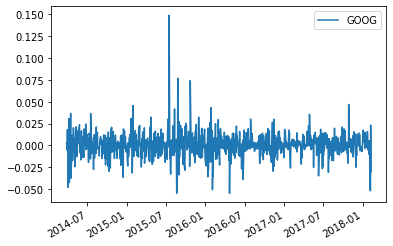

In [13]:
goog_ret.plot();

In [14]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()

In [15]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<AxesSubplot:>

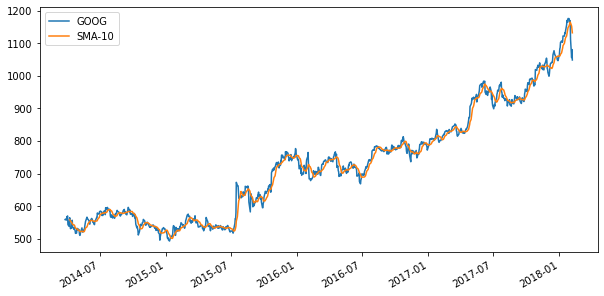

In [18]:
goog.plot(figsize=(10,5))

In [19]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

<AxesSubplot:>

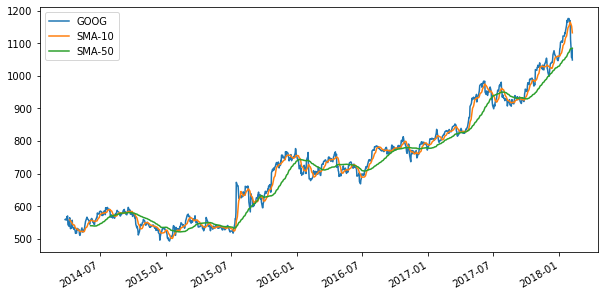

In [20]:
goog.plot(figsize=(10,5))

- By using more values in its sample, mean is even smoother than, say ten
- Lesson: \
    (1) The more values you use, the smoother the resulting time series will be \
    (2) This lagging characteristic in time series. That is, it appears as if the simple moving average lags behind the original time series

In [21]:
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [22]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [23]:
goog_aapl_ret = np.log(goog_aapl.pct_change(1) + 1)
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [25]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

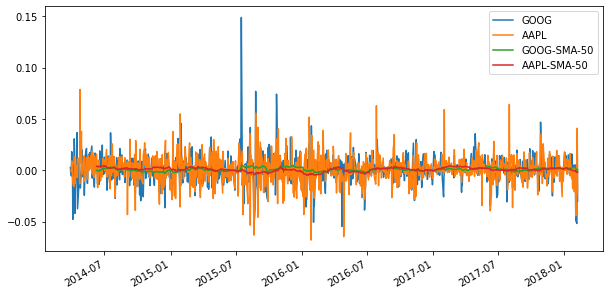

In [26]:
goog_aapl_ret.plot(figsize=(10,5));

In [27]:
cov = goog_aapl_ret[['GOOG','AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [28]:
corr = goog_aapl_ret[['GOOG','AAPL']].rolling(50).corr()
corr.tail(16)

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000